# Simple linear regression

We start by importing the necessary modules

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-1-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Now let's generate data for regression

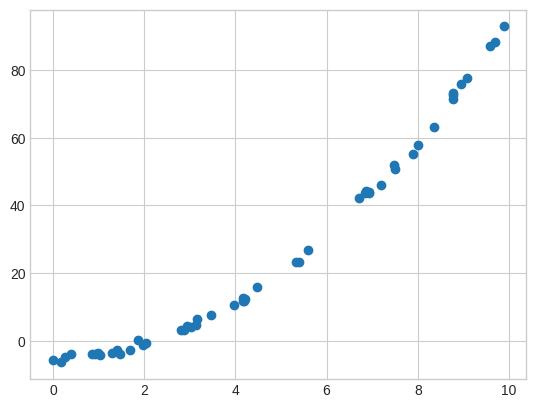

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = x**2 - 5 + rng.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's `LinearRegression` estimator to fit this data and construct the best-fit line, as shown in the following figure:

In [ ]:
X = np.array([x, x**2]).T
X

array([[4.17022005e+00, 1.73907352e+01],
       [7.20324493e+00, 5.18867376e+01],
       [1.14374817e-03, 1.30815988e-06],
       [3.02332573e+00, 9.14049845e+00],
       [1.46755891e+00, 2.15372915e+00],
       [9.23385948e-01, 8.52641608e-01],
       [1.86260211e+00, 3.46928663e+00],
       [3.45560727e+00, 1.19412216e+01],
       [3.96767474e+00, 1.57424429e+01],
       [5.38816734e+00, 2.90323473e+01],
       [4.19194514e+00, 1.75724041e+01],
       [6.85219500e+00, 4.69525764e+01],
       [2.04452250e+00, 4.18007224e+00],
       [8.78117436e+00, 7.71090232e+01],
       [2.73875932e-01, 7.50080261e-02],
       [6.70467510e+00, 4.49526682e+01],
       [4.17304802e+00, 1.74143298e+01],
       [5.58689828e+00, 3.12134324e+01],
       [1.40386939e+00, 1.97084925e+00],
       [1.98101489e+00, 3.92442000e+00],
       [8.00744569e+00, 6.41191864e+01],
       [9.68261576e+00, 9.37530479e+01],
       [3.13424178e+00, 9.82347155e+00],
       [6.92322616e+00, 4.79310604e+01],
       [8.763891

[0.00000000e+00 1.00200300e-04 4.00801202e-04 9.01802704e-04
 1.60320481e-03 2.50500751e-03 3.60721081e-03 4.90981472e-03
 6.41281923e-03 8.11622433e-03 1.00200300e-02 1.21242363e-02
 1.44288433e-02 1.69338508e-02 1.96392589e-02 2.25450676e-02
 2.56512769e-02 2.89578868e-02 3.24648973e-02 3.61723084e-02
 4.00801202e-02 4.41883325e-02 4.84969454e-02 5.30059589e-02
 5.77153730e-02 6.26251878e-02 6.77354031e-02 7.30460190e-02
 7.85570355e-02 8.42684526e-02 9.01802704e-02 9.62924887e-02
 1.02605108e-01 1.09118127e-01 1.15831547e-01 1.22745368e-01
 1.29859589e-01 1.37174211e-01 1.44689234e-01 1.52404657e-01
 1.60320481e-01 1.68436705e-01 1.76753330e-01 1.85270355e-01
 1.93987782e-01 2.02905608e-01 2.12023836e-01 2.21342464e-01
 2.30861492e-01 2.40580921e-01 2.50500751e-01 2.60620981e-01
 2.70941612e-01 2.81462644e-01 2.92184076e-01 3.03105909e-01
 3.14228142e-01 3.25550776e-01 3.37073811e-01 3.48797246e-01
 3.60721081e-01 3.72845318e-01 3.85169955e-01 3.97694992e-01
 4.10420430e-01 4.233462

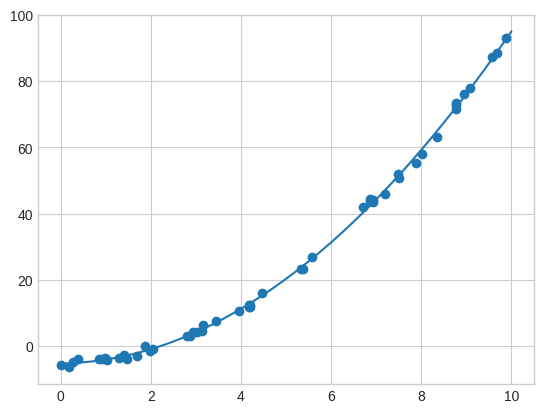

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(X, y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(np.array([xfit, xfit**2]).T)

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are `coef_` and `intercept_`:

In [ ]:
print("Model slope:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model slope:     [0.18470936 0.98390627]
Model intercept: -5.233130398426329


The `LinearRegression` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyperplane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


# Linear Regrssion on US Housing Price

## Linear regression primer

In statistics, linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares loss function as in ridge regression ($L_2$-norm penalty) and lasso ($L_1$-norm penalty). Conversely, the least squares approach can be used to fit models that are not linear models. Thus, although the terms "least squares" and "linear model" are closely linked, they are not synonymous.

### Import packages and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_csv("./sample_data/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Check basic info on the data set

**'info()' method to check the data types and number**

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**'describe()' method to get the statistical summary of the various features of the data set**

In [ ]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
10%,55047.633980,4.697755,5.681951,2.310000,23502.845262,7.720318e+05
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
90%,82081.188283,7.243978,8.274222,6.100000,48813.618633,1.684621e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**'columns' method to get the names of the columns (features)**

In [ ]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Basic plotting and visualization on the data set

**Pairplots using seaborn**

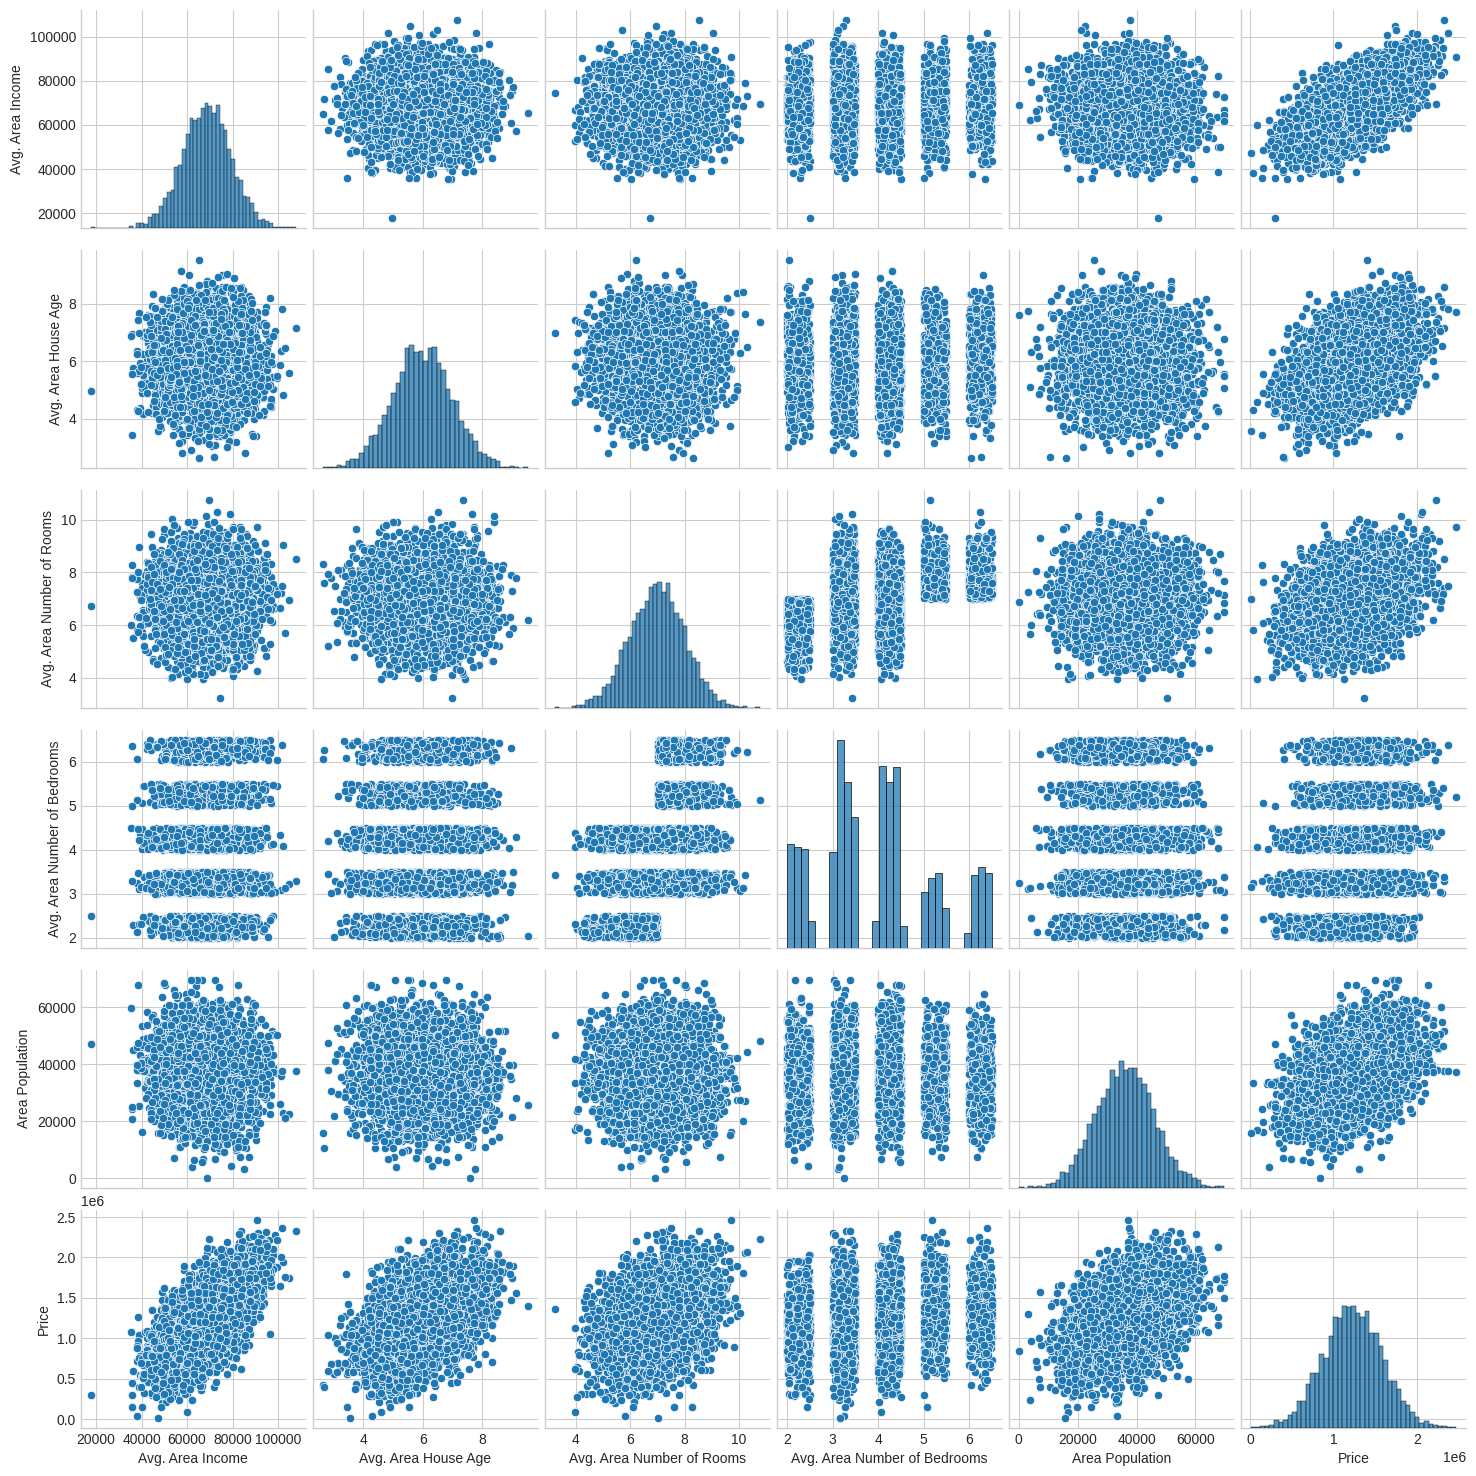

In [ ]:
sns.pairplot(df)

**Distribution of price (the predicted quantity)**

<Axes: ylabel='Frequency'>

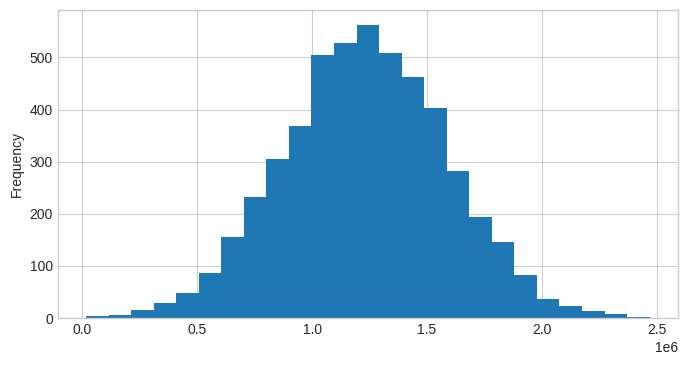

In [ ]:
df['Price'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

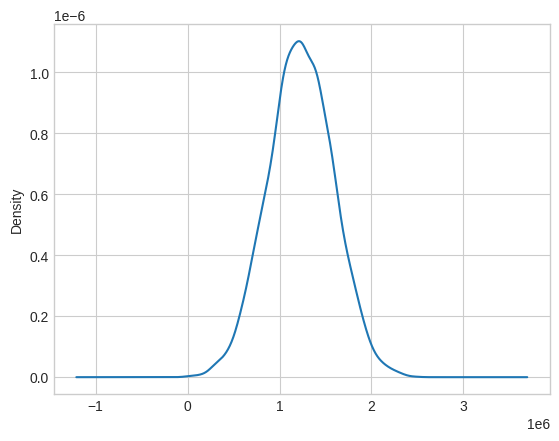

In [ ]:
df['Price'].plot.density()

**Correlation matrix and heatmap**

In [ ]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<ipython-input-15-73d88c5a3f1a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=2)


<Axes: >

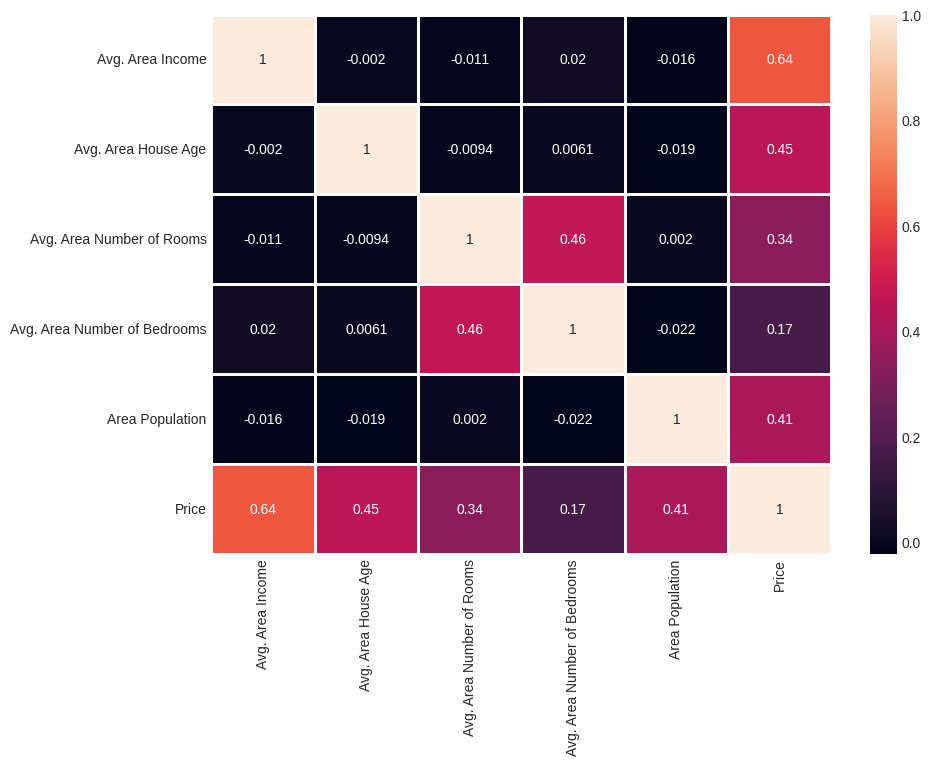

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

### Simple Regression

We see that avg area income is most correlated with price, let's fit data on this feature



In [ ]:
# Simple Regression
X = df[["Avg. Area Income"]]
X.head()

,Avg. Area Income
0,79545.458574
1,79248.642455
2,61287.067179
3,63345.240046
4,59982.197226


In [ ]:
y = df[["Price"]]
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (3500, 1)
Test feature set size: (1500, 1)
Training variable set size: (3500, 1)
Test variable set size: (1500, 1)


### Model fit and training

**Import linear regression model estimator from scikit-learn and instantiate**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'

**Fit the model on to the instantiated object itself**

In [ ]:
lm.fit(X_train,y_train); # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

**Check the intercept and coefficients and put them in a DataFrame**

In [ ]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: [-206897.4183646]


In [ ]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [[20.99607335]]


In [ ]:
# Calculate r-squared values
from sklearn import metrics
y_pred = lm.predict(X_test)
print("R-squared value of predictions:",round(metrics.r2_score(y_test,y_pred),3))

R-squared value of predictions: 0.417


### Multivariate Linear Regression

**Make a list of data frame column names**

In [ ]:
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

**Put all the numerical features in X and Price in y, ignore Address which is string for linear regression**

In [ ]:
X = df[l_column[0:len_feature-2]]
y = df[l_column[len_feature-2]]

In [ ]:
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (5000, 4)
Variable set size: (5000,)


In [ ]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [ ]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

### Test-train split

**Import train_test_split function from scikit-learn**

**Create X and y train and test splits in one command using a split ratio and a random seed**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

**Check the size and shape of train/test splits (it should be in the ratio as per test_size parameter above)**

In [ ]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (3500, 4)
Test feature set size: (1500, 4)
Training variable set size: (3500,)
Test variable set size: (1500,)


### Model fit and training

**Import linear regression model estimator from scikit-learn and instantiate**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'

**Fit the model on to the instantiated object itself**

In [ ]:
lm.fit(X_train,y_train); # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

**Check the intercept and coefficients and put them in a DataFrame**

In [ ]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: -2631264.66719886


In [ ]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [2.16064927e+01 1.65230326e+05 1.20874100e+05 1.52160130e+01]


In [ ]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
Avg. Area Income,21.606493
Avg. Area House Age,165230.325835
Avg. Area Number of Rooms,120874.099620
Area Population,15.216013


In [ ]:
# Calculate r-squared values
from sklearn import metrics
y_pred = lm.predict(X_test)
print("R-squared value of predictions:",round(metrics.r2_score(y_test,y_pred),3))

R-squared value of predictions: 0.92


In [ ]:
X = df[['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Area Population']]
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.458574,5.682861,7.009188,23086.800503
1,79248.642455,6.002900,6.730821,40173.072174
2,61287.067179,5.865890,8.512727,36882.159400
3,63345.240046,7.188236,5.586729,34310.242831
4,59982.197226,5.040555,7.839388,26354.109472
